# Loading data

In [27]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from itertools import product
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

df = pd.read_csv('./Table1_DOE.csv')

In [13]:
df.head()

,Speed_rpm,Cutting_thickness,Mold_height,Cpk
0,16,1,18,1.121667
1,20,1,18,1.192500
2,16,3,18,1.141667
3,20,3,18,1.221667
4,16,1,20,1.106667


/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


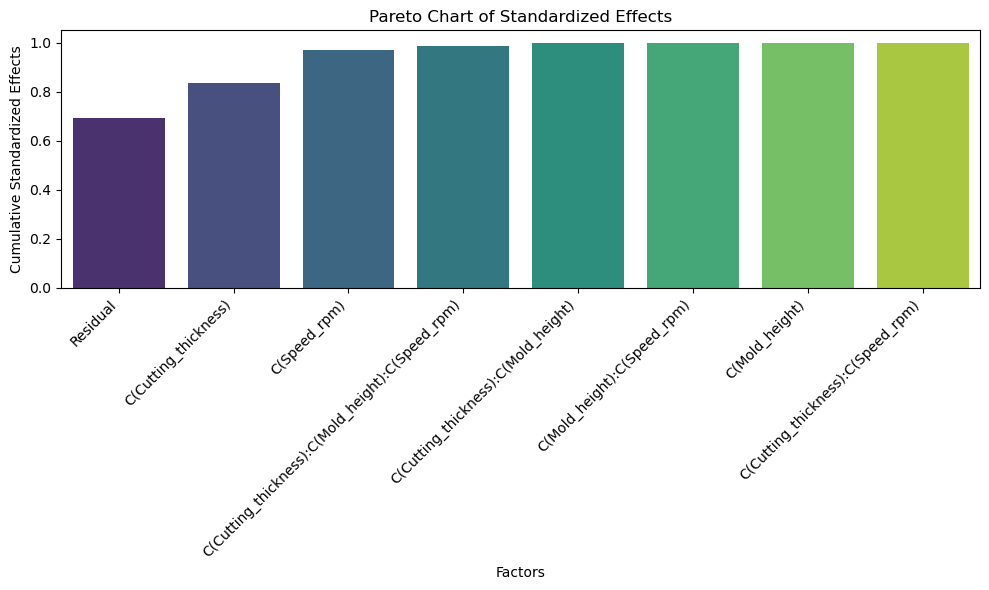

In [14]:
# Create the factorial design
formula = 'C(Cutting_thickness) * C(Mold_height) * C(Speed_rpm)'
model = ols('Cpk ~ ' + formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Calculate standardized effects
effects = anova_table['sum_sq'] / anova_table['sum_sq'].sum()

# Sort and calculate cumulative effects for Pareto
pareto_data = effects.sort_values(ascending=False).cumsum()

# Create the Pareto chart
plt.figure(figsize=(10, 6))
sns.barplot(x=pareto_data.index, y=pareto_data.values, palette="viridis")
plt.title('Pareto Chart of Standardized Effects')
plt.xlabel('Factors')
plt.ylabel('Cumulative Standardized Effects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the Pareto chart
plt.show()

In [17]:
anova_table

,sum_sq,df,F,PR(>F)
C(Cutting_thickness),0.008882,1.0,3.366089,0.085214
C(Mold_height),0.000046,1.0,0.017270,0.897084
C(Speed_rpm),0.008234,1.0,3.120808,0.096366
C(Cutting_thickness):C(Mold_height),0.000639,1.0,0.242137,0.629350
C(Cutting_thickness):C(Speed_rpm),0.000013,1.0,0.004955,0.944755
C(Mold_height):C(Speed_rpm),0.000128,1.0,0.048605,0.828298
C(Cutting_thickness):C(Mold_height):C(Speed_rpm),0.000899,1.0,0.340724,0.567550
Residual,0.042217,16.0,NaN,NaN


## Testing

    Speed_rpm  Cutting_thickness  Mold_height       Cpk
0          16                  1           18  1.121667
1          16                  1           18  1.206667
2          16                  1           18  1.106667
3          16                  1           20  1.106667
4          16                  1           20  1.196667
..        ...                ...          ...       ...
67         20                  3           18  1.221667
68         20                  3           18  1.215833
69         20                  3           20  1.157500
70         20                  3           20  1.227500
71         20                  3           20  1.250833

[72 rows x 4 columns]


/var/folders/q1/4q_xkc0n64x9cgpkj415nq9r0000gn/T/ipykernel_98768/897397332.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=full_design, x='Speed_rpm', y='Cpk', hue='Cutting_thickness', markers=["o", "s"], linestyles=["-", "--"], ci=None)
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

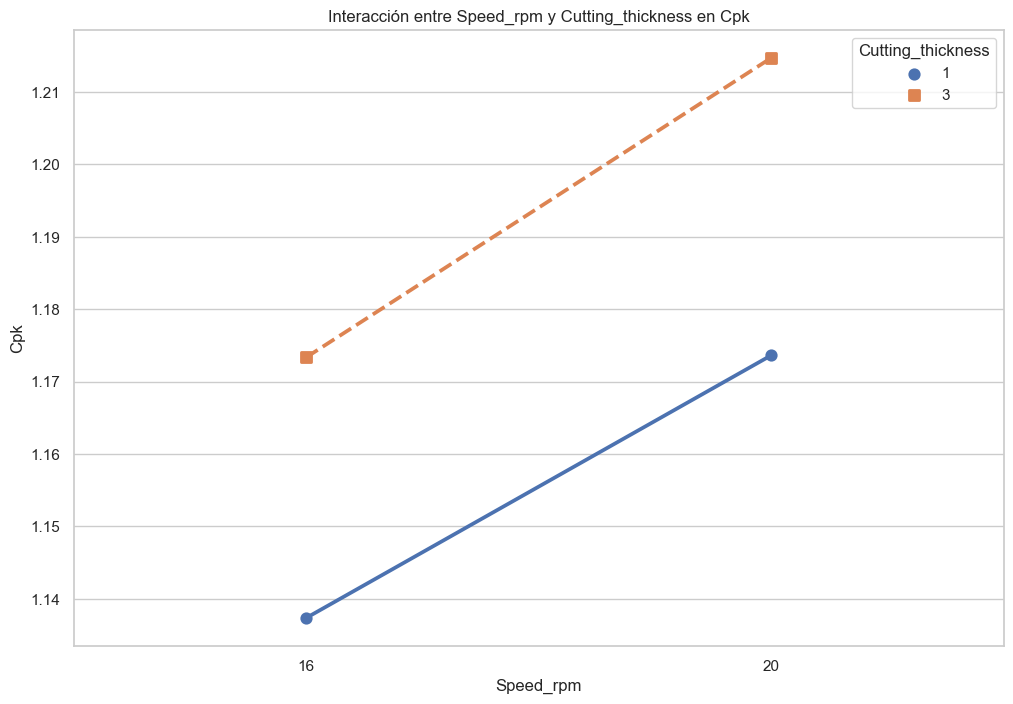

In [23]:
# Crear todas las combinaciones posibles para un diseño factorial 2^3
levels_speed = df['Speed_rpm'].unique()
levels_thickness = df['Cutting_thickness'].unique()
levels_height = df['Mold_height'].unique()

combinations = list(product(levels_speed, levels_thickness, levels_height))

# Crear un dfFrame con las combinaciones
columns = ['Speed_rpm', 'Cutting_thickness', 'Mold_height']
design_matrix = pd.DataFrame(combinations, columns=columns)

# Replicar el diseño 3 veces
replicates = 3
full_design = pd.concat([design_matrix] * replicates, ignore_index=True)

# Agregar la variable de respuesta Cpk desde el archivo CSV
full_design = pd.merge(full_design, df[['Speed_rpm', 'Cutting_thickness', 'Mold_height', 'Cpk']], on=['Speed_rpm', 'Cutting_thickness', 'Mold_height'], how='left')

# Visualizar el dfFrame (opcional)
print(full_design)

# Crear un gráfico de interacción utilizando Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.pointplot(data=full_design, x='Speed_rpm', y='Cpk', hue='Cutting_thickness', markers=["o", "s"], linestyles=["-", "--"], ci=None)
plt.title('Interacción entre Speed_rpm y Cutting_thickness en Cpk')
plt.show()

In [24]:
# Crear las variables independientes (X) y la variable dependiente (y)
X = df[['Speed_rpm', 'Cutting_thickness', 'Mold_height']]
y = df['Cpk']

# Agregar la constante para el término independiente (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión múltiple
model = sm.OLS(y, X).fit()

# Imprimir los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Cpk   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     2.474
Date:                Fri, 12 Jan 2024   Prob (F-statistic):             0.0911
Time:                        12:38:09   Log-Likelihood:                 41.573
No. Observations:                  24   AIC:                            -75.15
Df Residuals:                      20   BIC:                            -70.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.9348      0.19

*R-squared: 0.271*

In [26]:
# Crear las variables independientes (X) y la variable dependiente (y)
X = df[['Speed_rpm', 'Cutting_thickness', 'Mold_height']]
y = df['Cpk']

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Imprimir los coeficientes y el intercepto
print('Intercepto:', model.intercept_)
print('Coeficientes:', model.coef_)

Intercepto: 0.9348434091666665
Coeficientes: [0.00962618 0.01913909 0.00148591]


In [28]:
# Crear las variables independientes (X) y la variable dependiente (y)
X = df[['Speed_rpm', 'Cutting_thickness', 'Mold_height']]
y = df['Cpk']

# Agregar la constante para el término independiente (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión múltiple
model = sm.OLS(y, X).fit()

# Definir la función objetivo a minimizar (negativo de Cpk)
def negative_cpk(params):
    return -model.predict([1] + list(params))

# Inicializar las variables iniciales para la optimización
initial_values = [0, 0, 0]

# Realizar la optimización para maximizar Cpk
result = minimize(negative_cpk, initial_values, method='Nelder-Mead')

# Imprimir los resultados de la optimización
print('Valores que maximizan Cpk:', result.x)
print('Cpk maximizado:', -result.fun)

Valores que maximizan Cpk: [ 3.00192601e+50  5.75765794e+50 -1.19058863e+50]
Cpk maximizado: 1.3732428013365026e+49


*Use of Nelder-Mead to find the values that maximaze Cpk*

# Table2

In [29]:
df2 = pd.read_csv('./Table2_DOE.csv')
df2.head()

,Speed_rpm,Cutting_thickness,Mold_height,Cpk
0,16,1,18,1.121667
1,20,1,18,1.192500
2,16,3,18,1.141667
3,20,3,18,1.221667
4,16,1,20,1.106667


In [30]:
# Crear las variables independientes (X) y la variable dependiente (y)
X = df2[['Speed_rpm', 'Cutting_thickness', 'Mold_height']]
y = df2['Cpk']

# Agregar la constante para el término independiente (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión múltiple
model = sm.OLS(y, X).fit()

# Calcular el coeficiente de R cuadrada ajustado
r_squared_adj = model.rsquared_adj

# Imprimir el resultado
print('Coeficiente de R cuadrada ajustado:', r_squared_adj)

Coeficiente de R cuadrada ajustado: 0.03696350134030835


/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

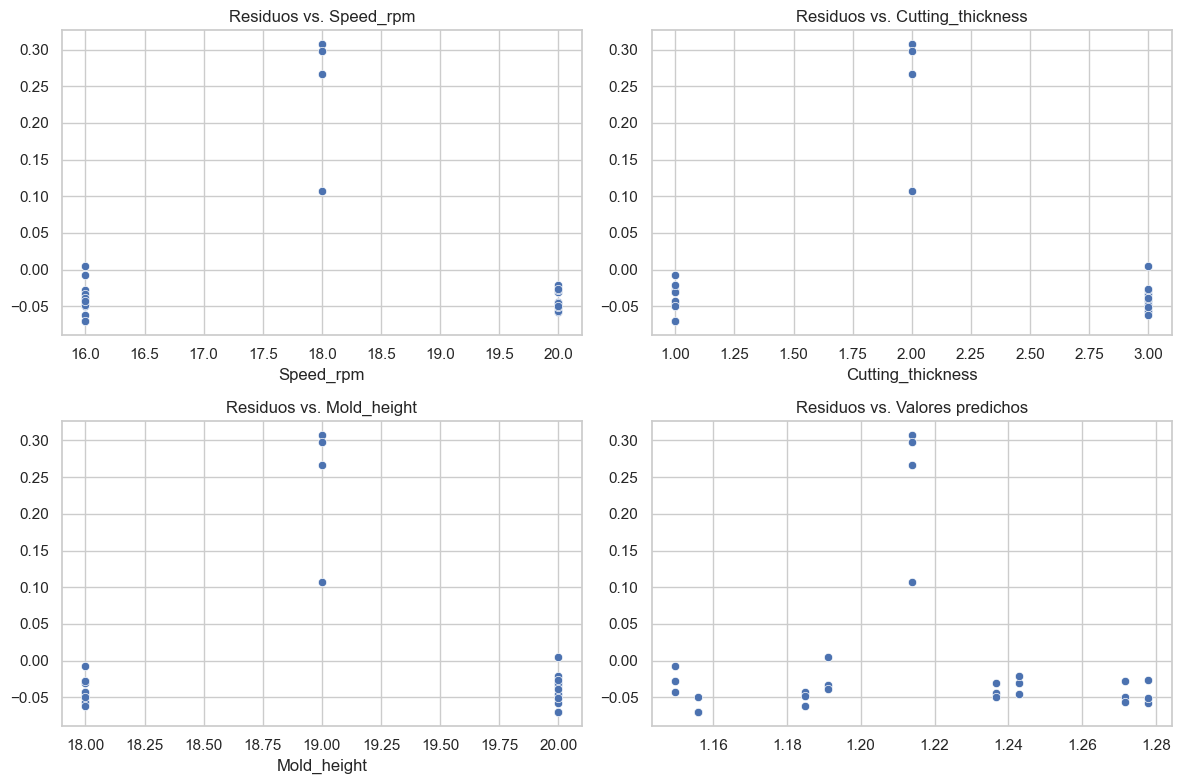

In [31]:
# Crear las variables independientes (X) y la variable dependiente (y)
X = df2[['Speed_rpm', 'Cutting_thickness', 'Mold_height']]
y = df2['Cpk']

# Agregar la constante para el término independiente (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión múltiple
model = sm.OLS(y, X).fit()

# Obtener los residuos del modelo
residuals = model.resid

# Visualizar la relación entre las variables independientes y los residuos
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x=df2['Speed_rpm'], y=residuals)
plt.title('Residuos vs. Speed_rpm')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df2['Cutting_thickness'], y=residuals)
plt.title('Residuos vs. Cutting_thickness')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df2['Mold_height'], y=residuals)
plt.title('Residuos vs. Mold_height')

plt.subplot(2, 2, 4)
sns.scatterplot(x=model.predict(X), y=residuals)
plt.title('Residuos vs. Valores predichos')

plt.tight_layout()
plt.show()

In [32]:
# Crear las variables independientes (X) y la variable dependiente (y)
X = df2[['Speed_rpm', 'Cutting_thickness', 'Mold_height']]

# Agregar términos cuadráticos y de interacción cuadrática
X['Speed_rpm_sq'] = X['Speed_rpm'] ** 2
X['Cutting_thickness_sq'] = X['Cutting_thickness'] ** 2
X['Mold_height_sq'] = X['Mold_height'] ** 2

X['Interaction_Speed_Cutting'] = X['Speed_rpm'] * X['Cutting_thickness']
X['Interaction_Speed_Mold'] = X['Speed_rpm'] * X['Mold_height']
X['Interaction_Cutting_Mold'] = X['Cutting_thickness'] * X['Mold_height']

# Agregar la constante para el término independiente (intercepto)
X = sm.add_constant(X)

# Crear el modelo de regresión múltiple
model = sm.OLS(df2['Cpk'], X).fit()

# Imprimir los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Cpk   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     29.79
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           3.04e-09
Time:                        12:54:04   Log-Likelihood:                 55.082
No. Observations:                  28   AIC:                            -94.16
Df Residuals:                      20   BIC:                            -83.51
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 